# EuroSAT Classification — Train ResNet18

This notebook trains a **ResNet18 model** on the **EuroSAT Dataset** using the dataloader and training functions from *./src*.

### 1. Setup environment and imports

In [ ]:
import torch
from torchvision import models
import torch.nn as nn
import sys
import os

sys.path.append(os.path.abspath("..")) 
from src.training.train import train_model
from src.training.evaluate import evaluate_model, plot_confusion_matrix



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

data_dir = '../data/raw'
checkpoint_dir = '../experiments/checkpoints'

Using device: cpu


### 2. Train baseline ResNet18 model

In [ ]:
model, classes = train_model(
    data_dir=data_dir,
    batch_size=64,
    epochs=5,
    lr=1e-4,
    model_name="resnet18",
    output_dir=checkpoint_dir
)

print(f"\nTraining completed. Number of classes: {len(classes)}")


Epoch 1/10


Train Loss: 0.8210 | Train Acc: 72.13%
Val Loss:   0.5687 | Val Acc:   80.00%
✅ New best model saved to ../experiments/checkpoints/resnet18_best.pth

Epoch 2/10


Train Loss: 0.3308 | Train Acc: 88.98%
Val Loss:   0.5627 | Val Acc:   81.41%
✅ New best model saved to ../experiments/checkpoints/resnet18_best.pth

Epoch 3/10


Train Loss: 0.1505 | Train Acc: 95.32%
Val Loss:   0.6916 | Val Acc:   80.49%

Epoch 4/10


Train Loss: 0.0709 | Train Acc: 97.99%
Val Loss:   0.7142 | Val Acc:   80.81%

Epoch 5/10


Train Loss: 0.0551 | Train Acc: 98.26%
Val Loss:   0.7523 | Val Acc:   80.86%

Epoch 6/10


Train Loss: 0.0459 | Train Acc: 98.46%
Val Loss:   0.8160 | Val Acc:   80.40%

Epoch 7/10


Training:  59%|█████▉    | 176/296 [05:00<03:23,  1.70s/it]

### 3. Evaluate final metrics on Test Dataset

In [ ]:
checkpoint_path = "../experiments/checkpoints/resnet18_best.pth"

metrics = evaluate_model(
    model_path=checkpoint_path,
    data_dir=data_dir,
    batch_size=64,
    model_name="resnet18",
    device=device
)


- Metrics

In [ ]:
print(f"Test Accuracy: {metrics['accuracy']*100:.2f}%")
print(f"Test Loss: {metrics['loss']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-score: {metrics['f1']:.4f}")

print("\nClassification metrics per category:\n\n", metrics["classification_report"])


Test Accuracy: 82.77%
Test Loss: 0.6247
Precision: 0.8240
Recall: 0.8252
F1-score: 0.8234

Classification metrics per category:
                       precision    recall  f1-score   support

          AnnualCrop     0.8299    0.8475    0.8386       472
              Forest     0.9417    0.9502    0.9459       442
HerbaceousVegetation     0.7303    0.7096    0.7198       458
             Highway     0.7764    0.6215    0.6903       391
          Industrial     0.8684    0.8730    0.8707       378
             Pasture     0.8188    0.8161    0.8174       299
       PermanentCrop     0.6776    0.6544    0.6658       379
         Residential     0.8522    0.9222    0.8858       450
               River     0.7976    0.8827    0.8380       375
             SeaLake     0.9474    0.9754    0.9612       406

            accuracy                         0.8277      4050
           macro avg     0.8240    0.8252    0.8234      4050
        weighted avg     0.8255    0.8277    0.8253      4050



- Confusion Matrix

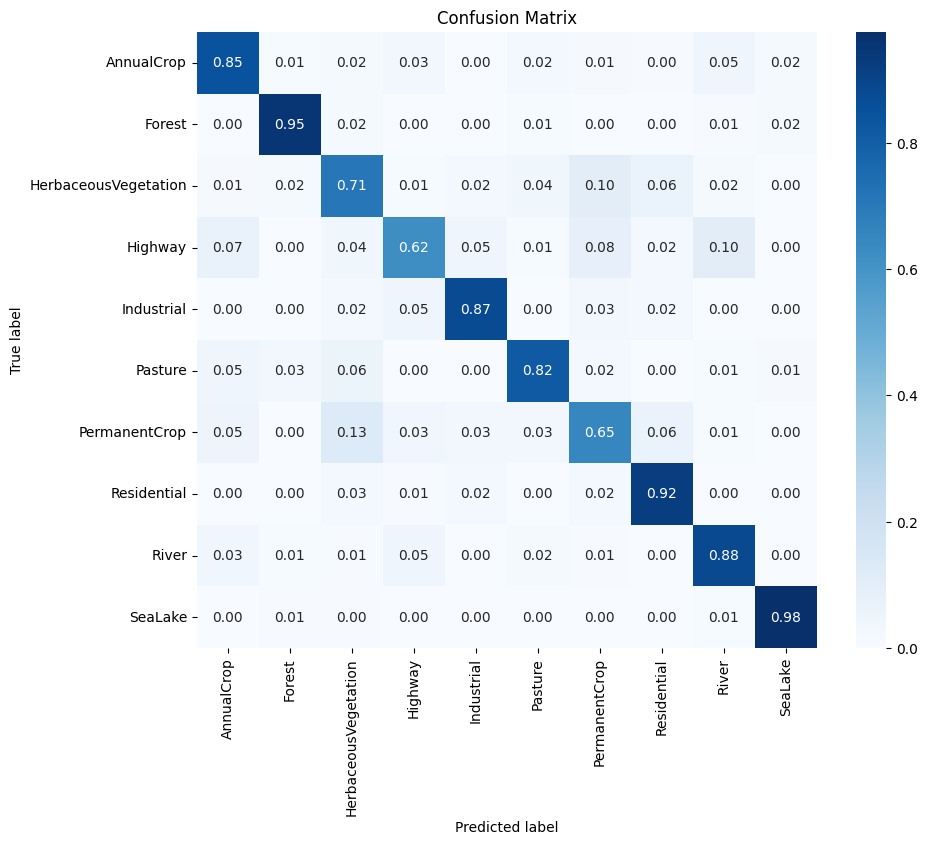

In [ ]:
plot_confusion_matrix(metrics["confusion_matrix"], metrics["class_names"])
